# Postprocessing Stretch Test

In [1]:
import sys
sys.path.append('..') 

import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np

import utils
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

#os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\keithley_results\121323-d1114-1-w-tempstab")
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\finalokdevice")
path =  os.getcwd()

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def create_folder(device_name,type_of_test,additional_comment= None):
    """
    create a new folder of the type mmddyyyy-devicename-type_of_test
    return path of the folder
    """
    today = datetime.now()
    if additional_comment:
        os.mkdir(today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test+'-'+additional_comment)
        return today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test+'-'+additional_comment
    else:
        os.mkdir(today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test)
        return today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test

In [3]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

In [4]:
# reading files and saving them in the dictionary df
df = {}
strain = ['0','25','50','75','100']
for st in strain: df[st] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls')]

WARNING *** file size (44774) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44778) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41068) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41062) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41076) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44768) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

### Computing the max values of the Right and Left curves, their mean and std for all the orientations

In [5]:
max_values = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df[st]] for st in strain]
mean = [np.mean(max_values[i],0) for i in range(len(strain))]
std = [np.std(max_values[i],0) for i in range(len(strain))]
std_diff = [np.std(np.array([max_values[i][j][0] for j in range(len(max_values[i]))])-np.array([max_values[i][j][1] for j in range(len(max_values[i]))]))*1000 for i in range(len(strain))]

### plotting all the orientations together


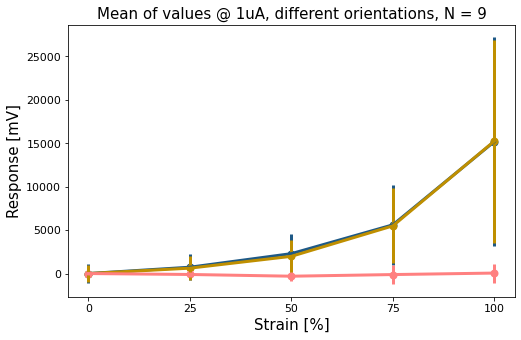

In [6]:
mean_L = np.array([i[0] for i in mean])*1000
mean_L = mean_L- mean_L[0]
mean_R = np.array([i[1] for i in mean])*1000
mean_R = mean_R- mean_R[0]

fig, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(strain,mean_L,label = 'Left', color = col_L, linewidth = 2)
plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std], color = col_L, linewidth = 3)
plt.scatter(strain,mean_R,label = 'Right', color = col_R, linewidth = 2)
plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std], color = col_R, linewidth = 3)
plt.scatter(strain,np.array(mean_R)-np.array(mean_L), label = 'Diff', color = col_diff, linewidth = 2)
plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff, color = col_diff, linewidth = 3)
#plt.legend(0)
#plt.grid()
plt.ylabel('Response [mV]', fontsize = 15)
plt.xlabel('Strain [%]', fontsize = 15)
ax1.tick_params(axis='both', labelsize=11)
plt.title('Mean of values @ 1uA, different orientations, N = 9', fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\stretchalltogether.jpeg')

In [19]:
print('Mean +- std @100%:', [round((np.array(mean_R)-np.array(mean_L))[4],3), round(std_diff[4],3)],' mV'  )

Mean +- std @100%: [53.278, 1101.381]  mV


In [8]:
print('Mean +- std @50%:', [round((np.array(mean_R)-np.array(mean_L))[2],3), round(std_diff[2],3)],' mV'  )

Mean +- std @50%: [-307.934, 504.531]  mV


In [9]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\finalokdevice")
path =  os.getcwd()
df_r = {}
row = ['1','2','3']
strain = ['0','25','50','75','100']
for r in row: 
    df_r[r] = {}
    for st in strain: df_r[r][st] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls') and 'r'+r in excelfile]

WARNING *** file size (44774) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41068) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41062) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44768) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41060) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41048) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44766) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

### Computing the max values of the Right and Left curves, their mean and std for each row

In [10]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}
for r in row:
    max_values_r[r] = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df_r[r][st]] for st in strain]
    mean_r[r] = [np.mean(max_values_r[r][i],0) for i in range(len(strain))]
    std_r[r] = [np.std(max_values_r[r][i],0) for i in range(len(strain))]
    std_diff_r[r] = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))]))*1000 for i in range(len(strain))]

### plotting the DeltaV as a function of the strain for each row (orientation)

In [20]:
mean_L_r

{'1': array([ 3474.63417053,  4305.33289909,  7285.54948171, 12001.75126394,
        28100.33671061]),
 '2': array([2065.99533558, 2505.04406293, 3463.89071147, 4719.72703934,
        6813.06823095]),
 '3': array([ 3339.94166056,  4257.46862094,  5005.59322039,  8984.80272293,
        19563.49102656])}

Mean +- std @25%: for row  1 [-1366.032, 544.828]  mV
Mean +- std @25%: for row  2 [451.093, 206.37]  mV
Mean +- std @25%: for row  3 [1099.653, 179.718]  mV


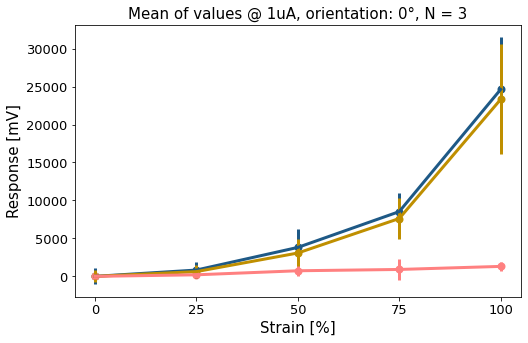

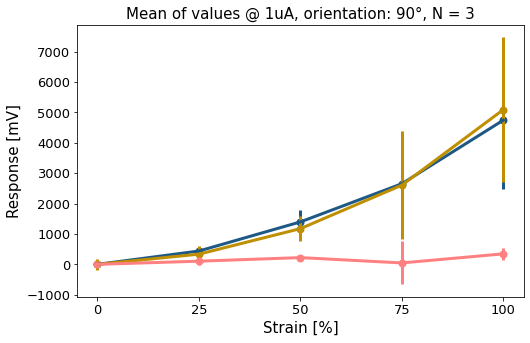

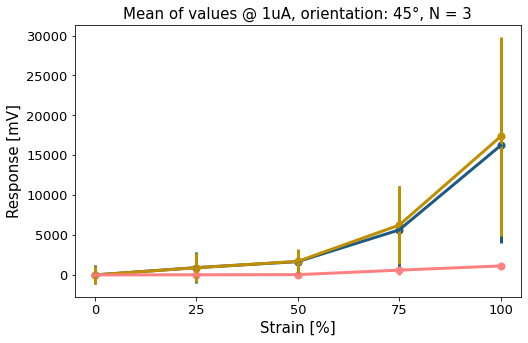

In [11]:
df_rows = {}
mean_L_r = {}
mean_R_r = {}
N = ['3','3', '3','3']
incl = ['0', '90', '45', '135']
for r in row:
    mean_L_r[r] = np.array([i[0] for i in mean_r[r] if not np.isnan(i).all()])*1000
    mean_R_r[r] = np.array([i[1] for i in mean_r[r] if not np.isnan(i).all()])*1000
    data = [mean_L_r[r]-mean_L_r[r][0], [i[0]*1000 for i in std_r[r] if not np.isnan(i).all()],mean_R_r[r]-mean_R_r[r][0], [i[1]*1000 for i in std_r[r] if not np.isnan(i).all()],  np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))]]
    df_rows[r] = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [mV]', 1: 'std_L [mV]', 2: 'Mean_R [mV]', 3: 'std_R [mV]', 4: 'Diff |Vl-VR| [mV]', 5: 'std diff [mV]'})

    fig, ax1 = plt.subplots(figsize=(8, 5))
    plt.scatter(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0],label = 'Left', color = col_L, linewidth = 2)
    plt.errorbar(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0], yerr = [i[0]*1000 for i in std_r[r] if not np.isnan(i).all()], color = col_L, linewidth = 3)
    plt.scatter(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0],label = 'Right', color = col_R, linewidth = 2)
    plt.errorbar(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0], yerr = [i[1]*1000 for i in std_r[r] if not np.isnan(i).all()], color = col_R, linewidth = 3)
    plt.scatter(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), label = 'Diff', color = col_diff, linewidth = 2)
    plt.errorbar(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), yerr = np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))], color = col_diff, linewidth = 3)
    #plt.legend(loc = 0)
    #plt.grid()
    plt.ylabel('Response [mV]',fontsize = 15)
    plt.xlabel('Strain [%]',fontsize = 15)
    ax1.tick_params(axis='both', labelsize=13)
    
    plt.title('Mean of values @ 1uA, orientation: ' + incl[int(r)-1]+'°, N = '+ N[int(r)-1],fontsize = 15)
    plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\stretchallthreeplots'+r+'.jpeg')
    print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[4],3), round(std_diff_r[r][4],3)],' mV'  )

In [ ]:
df_r['3']['75']

In [13]:
table_row_diff = pd.DataFrame()
orientation = ['0°','45°','90°']
for i,r in enumerate(['1','3','2']):
    print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[4],3), round(std_diff_r[r][4],3)],' mV'  )
    table_row_diff[orientation[i] + ': mean [mV]'] = (np.array(mean_R_r[r])-np.array(mean_L_r[r]))
    table_row_diff[orientation[i] + ': std [mV]'] = std_diff_r[r]
    

Mean +- std @25%: for row  1 [-1366.032, 544.828]  mV
Mean +- std @25%: for row  3 [1099.653, 179.718]  mV
Mean +- std @25%: for row  2 [451.093, 206.37]  mV


In [14]:
st = {
    0: '0% strain',
    1: '25% strain',
    2: '50% strain',
    3: '75% strain',
    4: '100% strain'
}
table_row_diff = table_row_diff.rename(index=st)
table_row_diff

,0°: mean [mV],0°: std [mV],45°: mean [mV],45°: std [mV],90°: mean [mV],90°: std [mV]
0% strain,-53.707600,285.163266,-26.946704,109.575910,105.534474,116.965992
25% strain,-259.038051,393.853467,-44.237614,125.138216,1.762946,137.426286
50% strain,-790.771484,624.095023,8.245945,42.890296,-116.397063,52.326488
75% strain,-963.203589,1359.091629,574.110826,560.536832,59.031804,708.399734
100% strain,-1366.032283,544.828299,1099.653085,179.717974,451.092561,206.370327


In [15]:
nomi_colonne = table_row_diff.columns.tolist()

# Dividi i nomi delle colonne in base ai delimitatori
nomi_suddivisi = [nome.split(': ') for nome in nomi_colonne]

# Estrai orientazioni e statistiche
orientazioni = [nome[0] for nome in nomi_suddivisi]
statistiche = [nome[1].split(' [')[0] for nome in nomi_suddivisi]

# Crea il MultiIndex
multi_indice = pd.MultiIndex.from_arrays([orientazioni, statistiche], names=['Orientation', 'Statistic [mV]'])

# Assegna il MultiIndex alle colonne del DataFrame
table_row_diff.columns = multi_indice

In [16]:
table_row_diff = table_row_diff.round(2)

In [17]:
styles = {
    ('0°', 'mean'): [{'selector': '', 'props': [('background-color', 'rgba(30, 89, 134, 0.15)')]}],
    ('0°', 'std'): [{'selector': '', 'props': [('background-color', 'rgba(30, 89, 134, 0.15)')]}],
    ('45°', 'mean'): [{'selector': '', 'props': [('background-color', ' rgba(191, 143, 0, 0.15)')]}],
    ('45°', 'std'): [{'selector': '', 'props': [('background-color', ' rgba(191, 143, 0, 0.15)')]}],
    ('90°', 'mean'): [{'selector': '', 'props': [('background-color', 'rgba(184, 131, 212, 0.15)')]}],
    ('90°', 'std'): [{'selector': '', 'props': [('background-color', 'rgba(196, 165, 222, 0.15)')]}]
}

styled_df = table_row_diff.style.set_table_styles(styles)

# Applica stili agli indici
styled_df = styled_df.set_properties(**{'background-color': 'rgba(200, 200, 200, 0.3)'})

styled_df.set_properties(**{'text-align': 'center'})
pd.set_option('colheader_justify', 'center')


In [18]:
styled_df = styled_df.format("{:.2f}")
styled_df

In [44]:
import dataframe_image as dfi

dfi.export(styled_df, r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\df_styled.png')

In [45]:
mean_L_r

{'1': array([ 3451.0821104 ,  4441.0652717 ,  8587.37881978, 13454.4801712 ,
        28100.33671061]),
 '2': array([2065.99533558, 2505.04406293, 3463.89071147, 4719.72703934,
        6813.06823095]),
 '3': array([ 3339.94166056,  4257.46862094,  5005.59322039,  8984.80272293,
        19563.49102656]),
 '4': array([], dtype=float64)}

In [ ]:
utils.save_table_xlsx(table_row_diff, 'STrain_insensitivity', 'StretchTestAllRows')

In [ ]:
# saving data for row2 in xlsx format
data = [mean_L, [i[0]*1000 for i in std],mean_R, [i[1]*1000 for i in std],  np.abs(np.array(mean_R)-np.array(mean_L)), std_diff]
#utils.save_table_xlsx(data, 'STrain_insensitivity', 'StretchTestAllRows')

In [ ]:
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [mV]', 1: 'std_L [mV]', 2: 'Mean_R [mV]', 3: 'std_R [mV]', 4: 'Diff |Vl-VR| [mV]', 5: 'std diff [mV]'})
table

In [ ]:
# saving data in an excel file with more sheets
writer = ExcelWriter(r"C:\Users\Desi\Desktop\TesiStanford\images-results\StretchTestDifferentRows.xlsx")
for key in df_rows.keys():
    df_rows[key].to_excel(writer, sheet_name="row #" + str(key))
writer.save()

## Poking experiment

In [ ]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\poke")
path =  os.getcwd()

df_poke = {}
strain = ['0','1','2']
print(os.listdir(str(os.getcwd())))

df_poke = [pd.read_excel(str(os.getcwd())+'\\'+excelfile, , logfile=open(os.devnull, 'w')) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls')]

In [ ]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}

max_values_r = [[i['DrainVLeft'].iloc[80],i['DrainVRight'].iloc[80]] for i in df_poke] 
#std_diff_r = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))]))*1000 for i in range(len(strain))]

In [ ]:
max_values = [max_values_r[2],max_values_r[0], max_values_r[1]]
mean_L = np.array([i[0] for i in max_values])*1000- mean_L[0]
mean_R = np.array([i[1] for i in max_values])*1000 - mean_R[0]

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(strain,mean_L,label = 'Left')
#plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std])
plt.scatter(strain,mean_R,label = 'Right')
#plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std])
plt.scatter(strain,np.abs(np.array(mean_R)-np.array(mean_L)), label = 'Diff')
#plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff)
plt.legend()
plt.grid()
plt.ylabel('DeltaV [V]')
plt.xlabel('Poke')
plt.title('Mean of values @ 1uA, different orientations, N = 10')

In [ ]:
df_poke[1].iloc[80]